## Result Analysis 

In [29]:
# imports 
from matplotlib import pyplot as plt
%matplotlib inline
import json

In [30]:
with open('2ndnovember_shift_1215.json') as f:
    employees = json.loads(f.read())

with open('dist_matrix.json') as f:
    distance_matrix = json.loads(f.read())

    
cab_types = ['INDICA', 'SUMO', 'TRAVELLER']
price = [15, 15, 20]
home_to_office_dist = [32396, 30741, 34848, 33956, 33956, 25656, 33593, 32478, 31763, 32349, 31908, 31539, 27389, 25691, 25974, 22072, 28146, 24379, 26005, 27953, 28205, 26611, 26834, 25776, 24799, 22712, 24400, 23946, 19095, 26269, 24329, 22565, 32495, 26405, 24789, 26341, 27352, 27530, 24633, 25104, 24096, 24135, 25363, 20546, 23082, 23894, 22587, 23289, 19271, 23261, 23261, 23261, 23456, 23799, 23928, 24060, 19224, 27080, 25894, 27383, 24611, 28565, 24938, 24168, 25758, 25424, 23010, 23109, 21605, 24427, 22205, 25063, 22565, 18718, 18082, 18995, 17173, 13403, 18519, 12571, 10361, 14312, 25150, 25592, 25588, 25771, 17563, 26345, 25414, 25190, 21541, 25782, 25227, 25152, 23256, 26559, 20198, 24193, 22143, 21248, 20600, 21389, 20099, 20583, 29724, 16662, 15306, 20180, 21031, 19898, 16224, 15226, 17070, 17997, 25064, 23195, 23765, 22172, 20607, 20998, 16949, 20366, 20739, 18685, 15446, 17299, 17632, 16630, 15571, 17395, 15754, 16249, 14229, 15707, 14645, 14329, 14552, 14598, 14544, 14121, 14720, 20774, 15831, 14397, 16404, 14715, 15018, 15332, 14375, 14375, 20443, 20963, 20415, 19677, 19390, 24039, 21148, 21108, 25468, 23524, 22419, 24094, 23237, 22222, 21279, 19767, 18480, 18498, 17356, 17819, 12256, 18246, 18246, 17633, 15638, 16340, 16378, 15456, 18865, 16953, 13330, 13506, 13531, 14522, 14543, 24840, 18567, 18528, 18528, 17969, 14484, 13621, 18467, 18474, 18622, 13566, 12299, 18891, 18365, 14973, 14404, 15775, 12299, 12267, 12267, 20029, 20158, 20391, 17923, 17927, 16969, 16725, 13101, 21143, 17620, 17758, 21921, 17858, 16987, 18173, 8866, 11092, 11940, 11380, 12588, 12969, 10888, 10934, 10433, 10423, 9351, 8783, 12198, 12258, 11511, 12135, 12098, 11167, 12395, 11533, 11983, 11544, 11584, 11836, 13068, 11735, 12067, 12067, 11118, 11118, 11118, 10922, 11130, 13204, 13337, 12577, 11781, 11609, 11592, 12614, 12067, 10522, 17888, 11839, 35769, 11738, 10762, 12597, 10268, 9958, 10377, 10386, 10386, 10278, 9446, 9446, 9434, 9615, 13410, 24542, 22517, 19263, 22602, 21802, 23054, 14160, 3173, 16492, 15436, 14939, 15419, 17039, 15089, 12200, 8269, 5718, 6746, 7719, 6528, 3201, 5090, 8660, 6139, 6020, 6154, 5968, 25459, 23698, 27167, 27961, 27392, 24634, 19395, 13265, 22073, 23888, 21832, 11983, 11983, 11983, 9589, 9589]

### employee count

In [31]:
employee_count = len(employees)
employee_count

322

In [32]:
def get_seat(cab):
    if cab is 'INDICA':
        return 4
    elif cab is 'SUMO':
        return 6
    else:
        return 12

In [33]:
def get_cab(n):
    if n <=4:
        return 'INDICA'
    elif n <=6:
        return 'SUMO'
    else:
        return 'TRAVELLER'

In [34]:
def cab_occupancy(poools):
    # pool_count_with_types
    empcnt = 0 
    pool_cnts = {}
    for pool in poools:
        if len(pool) not in pool_cnts:
            pool_cnts[len(pool)] = 0
        pool_cnts[len(pool)] += 1
    ret = [0, 0, 0]
    for k,val in pool_cnts.items():
        print("{}           => {}".format(str(k), str(val)))
        if k <=4:
            ret[0] += k * val
        elif k<=6:
            ret[1] += k*val
        else:
            ret[2] += k*val
    return ret
        

In [35]:
def droute_dist(pool, employee_dists, employee_droute, employee_cabs):
    rev = pool[::-1]
    cur = rev[0]
    idd = employees.index(cur)
    total_dist = home_to_office_dist[idd]
    employee_dists[idd] = total_dist
    employee_droute[idd] = 1
    droutes = [1]
    cab = get_cab(len(pool))
    employee_cabs[idd] = cab
    for pick in rev[1:]:
        idx = employees.index(cur)
        p = employees.index(pick)
        dis = distance_matrix[p][idx]
        total_dist += dis
        x = home_to_office_dist[p]
        droute = (total_dist * 1.0) / x  
        cur = pick
        employee_dists[p] = total_dist
        employee_droute[p] = droute
        employee_cabs[p] = cab
        droutes.append(droute)
    return max(droutes), total_dist

### Our Pools

In [36]:
our_result = [[279, 284, 283, 280, 282, 281, 285, 286],
 [264, 59, 58, 315, 314, 312, 313, 266, 261, 321, 320],
 [293],
 [32, 37, 39, 34, 38, 47, 46, 262, 201, 200, 251],
 [2, 3, 4, 12, 5, 25, 141, 287, 288, 289, 290],
 [6, 7, 9, 10, 11, 8, 311, 81, 77, 79],
 [291, 292],
 [93, 69, 94, 214, 86, 210, 217, 219, 277, 299],
 [296],
 [35, 158, 165, 174, 181, 224, 226, 302, 305, 303],
 [295],
 [0, 1, 104, 26, 30, 27, 44, 175, 202, 196, 237],
 [61, 62, 63, 66, 222, 223, 221, 80, 272, 271, 273],
 [114, 115, 116, 118, 119, 117, 122, 121, 123, 113],
 [97, 98, 100, 107, 109, 112, 267, 268, 269, 270, 294],
 [75, 73, 78, 74, 76, 212, 254, 253, 259, 255],
 [209, 208, 211, 218, 215],
 [126, 129, 125, 120, 127, 131, 142, 133],
 [130, 128, 124, 134, 137, 138, 136, 135, 139, 132, 140],
 [105, 144, 110, 147, 106, 111, 145, 143, 148, 149, 146],
 [95, 42, 89, 92, 88, 91, 87, 85, 84, 83, 82],
 [90, 101, 108, 103, 96, 102, 99, 206, 205, 207],
 [64, 65, 71, 60, 307, 72, 70, 67, 316, 68],
 [20, 16, 19, 57, 18, 15, 216, 31],
 [161, 159, 162, 160, 163, 164, 172, 171, 173, 300],
 [309, 310, 308, 14, 13, 306],
 [29, 17, 48, 198, 28, 56, 199, 190, 191, 195, 278],
 [22, 21, 23, 24, 185],
 [41, 40, 54, 55, 155, 53, 52, 51, 49, 50, 45],
 [178, 166, 167, 227, 228, 229, 230, 301, 297, 298, 304],
 [36, 33, 244, 180, 225, 275, 274, 276, 220, 231],
 [238, 170, 232, 233, 235],
 [156, 157, 43, 243, 258, 234, 257, 256, 263, 260, 265],
 [242, 241, 239, 252, 250, 248, 249],
 [203, 204, 246, 247, 245, 319, 318, 240, 317, 236],
 [197, 187, 188, 189, 169, 168],
 [213, 151, 150, 152, 153, 154, 194, 193, 192, 186],
 [179, 176, 177, 183, 184, 182]]

our_pools = [list(map(lambda i: employees[i], pool)) for pool in our_result]

In [37]:
## our pool Count
our_count = len(our_pools)
our_cabs = list(map(lambda pool: get_cab(len(pool)), our_pools))
our_cab_count = [our_cabs.count('INDICA'), our_cabs.count('SUMO'), our_cabs.count('TRAVELLER')]

our_cab_wise_droutes = [[], [], []]
our_cab_wise_dists = [0, 0, 0]
our_employee_wise_droute = [0]*employee_count
our_employee_wise_dists = [0]*employee_count
our_employee_wise_cabs = ['']*employee_count
for pool in our_pools:
    droute, total_dist = droute_dist(pool, our_employee_wise_dists, our_employee_wise_droute, our_employee_wise_cabs)
    if len(pool) <= 4:
        i = 0
    elif len(pool) <= 6:
        i = 1
    else:
        i = 2
    our_cab_wise_droutes[i].append(droute)
    our_cab_wise_dists[i] += total_dist


### Their Pools

In [38]:
their_pools = []
prev = employees[0]
cur = [prev]
for emp in employees[1:]:
    if prev['serial_no'] >= emp['serial_no']:
        their_pools.append(cur)
        prev = emp 
        cur = [emp]
    else:
        cur.append(emp)

if cur:
    their_pools.append(cur)

In [39]:
their_count = len(their_pools)
their_cabs = list(map(lambda pool: get_cab(len(pool)), their_pools))
their_cab_count = [their_cabs.count('INDICA'), their_cabs.count('SUMO'), their_cabs.count('TRAVELLER')]


their_cab_wise_droutes = [[], [], []]
their_cab_wise_dists = [0, 0, 0]
their_employee_wise_droute = [0]*employee_count
their_employee_wise_dists = [0]*employee_count
their_employee_wise_cabs = ['']*employee_count
for pool in their_pools:
    droute, total_dist = droute_dist(pool, their_employee_wise_dists, their_employee_wise_droute, their_employee_wise_cabs)
    if len(pool) <= 4:
        i = 0
    elif len(pool) <= 6:
        i = 1
    else:
        i = 2
    their_cab_wise_droutes[i].append(droute)
    their_cab_wise_dists[i] += total_dist


# COMPARISON STARTS HERE

In [40]:
their_stats = {}
our_stats = {}

## Cab Count

#### Their Cab Count

In [41]:
their_stats['cab_count'] = {}
for tp, cnt in zip(cab_types, their_cab_count):
    their_stats['cab_count'][tp] = cnt
    print('{} :{}'.format(tp, cnt))

INDICA :34
SUMO :14
TRAVELLER :18


#### Our Cab Count

In [42]:
our_stats['cab_count'] = {}
for tp, cnt in zip(cab_types, our_cab_count):
    our_stats['cab_count'][tp] = cnt
    print('{} :{}'.format(tp, cnt))

INDICA :4
SUMO :6
TRAVELLER :28


## Cab Wise TOTAL Distance Covered 

#### Theirs

In [43]:
print("~~~~~~~~~~~~~~~~~~TOTAL DISTANCE COVERED BY DIFFERENT CAB TYPES~~~~~~~~~~~~~~~~~")
their_stats['cab_wise_distance'] = {}
for tp, dist in zip(cab_types, their_cab_wise_dists):
    print('{} :{}'.format(tp, dist/1000.0))
    their_stats['cab_wise_distance'][tp] = dist/1000.0

~~~~~~~~~~~~~~~~~~TOTAL DISTANCE COVERED BY DIFFERENT CAB TYPES~~~~~~~~~~~~~~~~~
INDICA :872.29868
SUMO :455.906
TRAVELLER :643.1962000000001


#### Ours

In [44]:
print("~~~~~~~~~~~~~~~~~~TOTAL DISTANCE COVERED BY DIFFERENT CAB TYPES~~~~~~~~~~~~~~~~~")
our_stats['cab_wise_distance'] = {}
for tp, dist in zip(cab_types, our_cab_wise_dists):
    print('{} :{}'.format(tp, dist/1000.0))
    our_stats['cab_wise_distance'][tp] = dist/1000.0

~~~~~~~~~~~~~~~~~~TOTAL DISTANCE COVERED BY DIFFERENT CAB TYPES~~~~~~~~~~~~~~~~~
INDICA :42.129
SUMO :136.302
TRAVELLER :840.1518400000001


## Cab wise AVERAGE Distance Covered

#### Theirs

In [45]:
print("~~~~~~~~~~~~~~~~~~AVERAGE DISTANCE COVERED BY A SINGLE CAB OF DIFFERENT TYPES~~~~~~~~~~~~~~~~~")
their_stats['cab_wise_avg_distance'] = {}
for i in range(3):
    print('{} :{}'.format(cab_types[i], their_cab_wise_dists[i]/(1000.0*their_cab_count[i])))  
    their_stats['cab_wise_avg_distance'][cab_types[i]] = their_cab_wise_dists[i]/(1000.0*their_cab_count[i])

~~~~~~~~~~~~~~~~~~AVERAGE DISTANCE COVERED BY A SINGLE CAB OF DIFFERENT TYPES~~~~~~~~~~~~~~~~~
INDICA :25.65584352941176
SUMO :32.56471428571429
TRAVELLER :35.73312222222223


In [46]:
print("~~~~~~~~~~~~~~~~~~AVERAGE DISTANCE COVERED BY A SINGLE CAB OF DIFFERENT TYPES~~~~~~~~~~~~~~~~~")
our_stats['cab_wise_avg_distance'] = {}
for i in range(3):
    print('{} :{}'.format(cab_types[i], our_cab_wise_dists[i]/(1000.0*our_cab_count[i])))  
    our_stats['cab_wise_avg_distance'][cab_types[i]] = our_cab_wise_dists[i]/(1000.0*our_cab_count[i])

~~~~~~~~~~~~~~~~~~AVERAGE DISTANCE COVERED BY A SINGLE CAB OF DIFFERENT TYPES~~~~~~~~~~~~~~~~~
INDICA :10.53225
SUMO :22.717
TRAVELLER :30.00542285714286


## Cab wise Price 

#### Theirs

In [47]:
print("~~~~~~~~~~~~~~~~~~TOTAL Price Paid For DIFFERENT CAB TYPES~~~~~~~~~~~~~~~~~")
their_stats['cab_type_price'] = {}
their_total_price = 0
for i in range(3):
    prc = price[i]*(their_cab_wise_dists[i]/1000.0)
    print('{} :{}'.format(cab_types[i],  prc))
    their_stats['cab_type_price'][cab_types[i]] = prc
    their_total_price += prc
their_stats['total_price'] = their_total_price
print('Their Total Price: :{}'.format(their_total_price))

~~~~~~~~~~~~~~~~~~TOTAL Price Paid For DIFFERENT CAB TYPES~~~~~~~~~~~~~~~~~
INDICA :13084.4802
SUMO :6838.59
TRAVELLER :12863.924000000003
Their Total Price: :32786.9942


#### Ours

In [48]:
print("~~~~~~~~~~~~~~~~~~TOTAL Price Paid For DIFFERENT CAB TYPES~~~~~~~~~~~~~~~~~")
our_total_price = 0
our_stats['cab_type_price'] = {}
for i in range(3):
    prc = price[i]*(our_cab_wise_dists[i]/1000.0)
    our_stats['cab_type_price'][cab_types[i]] = prc
    print('{} :{}'.format(cab_types[i],  prc))
    our_total_price += prc
our_stats['total_price'] = our_total_price
print('Our Total Price: :{}'.format(our_total_price))

~~~~~~~~~~~~~~~~~~TOTAL Price Paid For DIFFERENT CAB TYPES~~~~~~~~~~~~~~~~~
INDICA :631.935
SUMO :2044.53
TRAVELLER :16803.0368
Our Total Price: :19479.501800000002


#### Efficeincy Difference

In [49]:
price_efficiency = their_total_price / our_total_price - 1
print("Price Efficiency: {}".format(price_efficiency))

Price Efficiency: 0.6831536317833342


## Cab Wise MEAN droute
Maximum Droute(**dissatisfaction ratio**) in a cab

#### Theirs

In [51]:
print("~~~~~~~~~~~~~~~~~~Cab wise average droutes: ~~~~~~~~~~~~~~~~~")
their_stats['cab_wise_avg_droutes'] = {}
for typ, droutes in zip(cab_types, their_cab_wise_droutes):
    print("{}:     {}".format(typ, sum(droutes)/len(droutes)))
    their_stats['cab_wise_avg_droutes'][typ] = sum(droutes)/len(droutes)

~~~~~~~~~~~~~~~~~~Cab wise average droutes: ~~~~~~~~~~~~~~~~~
INDICA:     1.3754080727344047
SUMO:     1.7617034285420645
TRAVELLER:     2.0550577412250264


#### Ours

In [52]:
print("~~~~~~~~~~~~~~~~~~Cab wise average droutes: ~~~~~~~~~~~~~~~~~")
our_stats['cab_wise_avg_droutes'] = {}
for typ, droutes in zip(cab_types, our_cab_wise_droutes):
    print("{}:     {}".format(typ, sum(droutes)/len(droutes)))
    our_stats['cab_wise_avg_droutes'][typ] = sum(droutes)/len(droutes)

SyntaxError: invalid syntax (<ipython-input-52-b31a2fac5ce7>, line 5)

### INDICA

Cab Type: INDICA


<BarContainer object of 34 artists>

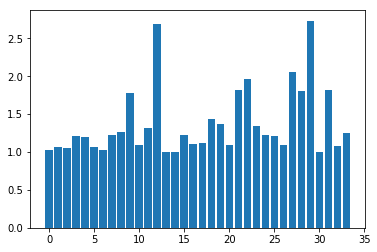

In [53]:
print("Cab Type: INDICA")
plt.bar(range(len(their_cab_wise_droutes[0])), their_cab_wise_droutes[0])

Cab Type: SUMO


<BarContainer object of 14 artists>

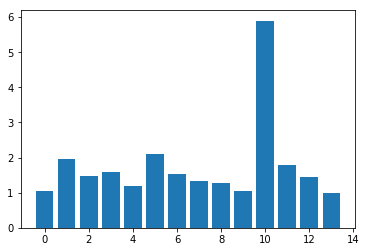

In [54]:
print("Cab Type: SUMO")
plt.bar(range(len(their_cab_wise_droutes[1])), their_cab_wise_droutes[1])

## OCCUPANCY 

#### theirs

In [55]:

print("pool size:     people count")
their_occupancy = cab_occupancy(their_pools)

pool size:     people count
2           => 5
4           => 17
7           => 9
3           => 9
5           => 9
6           => 5
8           => 6
9           => 2
1           => 3
10           => 1


In [56]:
their_occupancy

[108, 75, 139]

In [57]:
their_stats['occupancy'] = {}
their_stats['people_by_cab'] = {}
for i in range(3):
    their_stats['people_by_cab'][cab_types[i]] = their_occupancy[i]
    their_stats['occupancy'][cab_types[i]] = their_occupancy[i] / (get_seat(cab_types[i])*their_cab_count[i])
    print("CAB TYPE: {}       => {}".format(cab_types[i], their_occupancy[i] / (get_seat(cab_types[i])*their_cab_count[i])))
    

CAB TYPE: INDICA       => 0.7941176470588235
CAB TYPE: SUMO       => 0.8928571428571429
CAB TYPE: TRAVELLER       => 0.6435185185185185


#### ours

In [58]:
print("pool size:     people count")
our_occupancy = cab_occupancy(our_pools)
our_stats['occupancy'] = {}
our_stats['people_by_cab'] = {}
for i in range(3):
    our_stats['people_by_cab'][cab_types[i]] = our_occupancy[i]
    our_stats['occupancy'][cab_types[i]] = our_occupancy[i] / (get_seat(cab_types[i])*our_cab_count[i])
    print("CAB TYPE: {}       => {}".format(cab_types[i], our_occupancy[i] / (get_seat(cab_types[i])*our_cab_count[i])))


pool size:     people count
8           => 3
11           => 13
1           => 3
10           => 11
2           => 1
5           => 3
6           => 3
7           => 1
CAB TYPE: INDICA       => 0.3125
CAB TYPE: SUMO       => 0.9166666666666666
CAB TYPE: TRAVELLER       => 0.8452380952380952


In [59]:
our_occupancy

[5, 33, 284]

## EMPLOYEE WISE DROUTE

<BarContainer object of 322 artists>

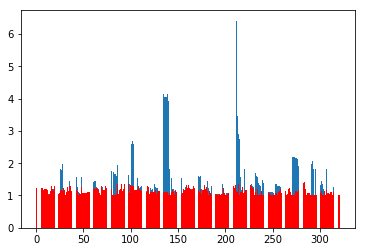

In [60]:
plt.bar(range(len(their_employee_wise_droute)), their_employee_wise_droute)
plt.bar(range(len(our_employee_wise_droute)), our_employee_wise_droute, color='red')

#### Number of Cases Our Droute is good

In [61]:
good = 0
for i in range(len(employees)):
    if their_employee_wise_droute[i] >= our_employee_wise_droute[i]:
        good +=1

In [62]:
good

189

## EMPLOYEE WISE DISTANCE

<BarContainer object of 322 artists>

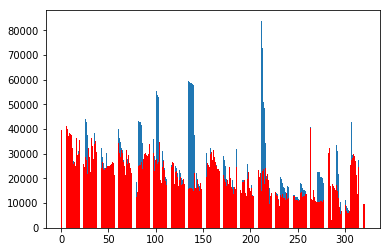

In [63]:
plt.bar(range(len(their_employee_wise_dists)), their_employee_wise_dists)
plt.bar(range(len(our_employee_wise_dists)), our_employee_wise_dists, color='red')

In [64]:
our_employee_wise_dists

[39630.96,
 37077.96,
 41666.84,
 40292.84,
 40292.84,
 28871,
 41140.72,
 40029.72,
 37203.72,
 38482.72,
 38041.72,
 37672.72,
 32175,
 25855,
 26804,
 25137,
 36204,
 29559,
 29732,
 35795,
 36693,
 28427,
 29256,
 27069,
 25961,
 24458,
 28897.96,
 27688.96,
 21841,
 32352,
 28827.96,
 22565,
 36268,
 32986.12,
 27951,
 34022,
 35197.12,
 30930,
 26601,
 28265,
 27373,
 27835,
 30529,
 24142.760000000002,
 26596.96,
 23894,
 23470,
 24304,
 24118,
 25110,
 25110,
 25110,
 25367,
 25776,
 26759,
 26412,
 21215,
 33944,
 28466.32,
 29958.32,
 28394,
 34215.04,
 30516.04,
 28856.04,
 31340,
 30355,
 26697.04,
 24905,
 21605,
 31495.68,
 25998,
 29442,
 26348,
 24378,
 22078,
 24998,
 19818,
 13395,
 23322,
 12571,
 12313,
 14523,
 25150,
 25627,
 25631,
 26727,
 23753.68,
 27802,
 29810,
 30151,
 29401,
 29173,
 30092,
 33834.68,
 29611.68,
 32120,
 25792,
 32326,
 30239,
 23167,
 27556,
 27917,
 25693,
 26543,
 34643.96,
 19458,
 18065,
 24460,
 27054,
 23400,
 19023,
 17350,
 19762,

In [65]:
json.dumps(their_pools)

'[[{"ID": 271056, "Gender": "F", "Contact_Number": 9731525252, "Login_Logout": "Login", "Shift_Date": "11/2/2017", "Shift_Time": "12:15", "pickup_time": "10:30", "pickup_area": "", "Pickup_point": "8th Mail Nagasandra Sobha Apartement Deepak Stop", "serial_no": 1, "Escort": "N", "lat": "13.0470904", "lon": "77.5007467"}, {"ID": 300111, "Gender": "M", "Contact_Number": 9611550033, "Login_Logout": "Login", "Shift_Date": "11/2/2017", "Shift_Time": "12:15", "pickup_time": "10:40", "pickup_area": "", "Pickup_point": "Jalahalli Cross SM Road Ayyappa temple road Indian oil petrol pump", "serial_no": 2, "Escort": "N", "lat": "13.0436527", "lon": "77.520588"}], [{"ID": 345656, "Gender": "M", "Contact_Number": 9379955352, "Login_Logout": "Login", "Shift_Date": "11/2/2017", "Shift_Time": "12:15", "pickup_time": "10:30", "pickup_area": "", "Pickup_point": "Abbigere Somashettihalli Pipeline Road Janapriya Green Woods Apartements", "serial_no": 1, "Escort": "N", "lon": "77.513442", "lat": "13.084971

In [66]:
json.dumps(their_stats)

'{"cab_count": {"INDICA": 34, "SUMO": 14, "TRAVELLER": 18}, "cab_wise_distance": {"INDICA": 872.29868, "SUMO": 455.906, "TRAVELLER": 643.1962000000001}, "cab_wise_avg_distance": {"INDICA": 25.65584352941176, "SUMO": 32.56471428571429, "TRAVELLER": 35.73312222222223}, "cab_type_price": {"INDICA": 13084.4802, "SUMO": 6838.59, "TRAVELLER": 12863.924000000003}, "total_price": 32786.9942, "cab_wise_avg_droutes": {"INDICA": 1.3754080727344047, "SUMO": 1.7617034285420645, "TRAVELLER": 2.0550577412250264}, "occupancy": {"INDICA": 0.7941176470588235, "SUMO": 0.8928571428571429, "TRAVELLER": 0.6435185185185185}, "people_by_cab": {"INDICA": 108, "SUMO": 75, "TRAVELLER": 139}}'

In [67]:
json.dumps(our_stats)

'{"cab_count": {"INDICA": 4, "SUMO": 6, "TRAVELLER": 28}, "cab_wise_distance": {"INDICA": 42.129, "SUMO": 136.302, "TRAVELLER": 840.1518400000001}, "cab_wise_avg_distance": {"INDICA": 10.53225, "SUMO": 22.717, "TRAVELLER": 30.00542285714286}, "cab_type_price": {"INDICA": 631.935, "SUMO": 2044.53, "TRAVELLER": 16803.0368}, "total_price": 19479.501800000002, "occupancy": {"INDICA": 0.3125, "SUMO": 0.9166666666666666, "TRAVELLER": 0.8452380952380952}, "people_by_cab": {"INDICA": 5, "SUMO": 33, "TRAVELLER": 284}}'